In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


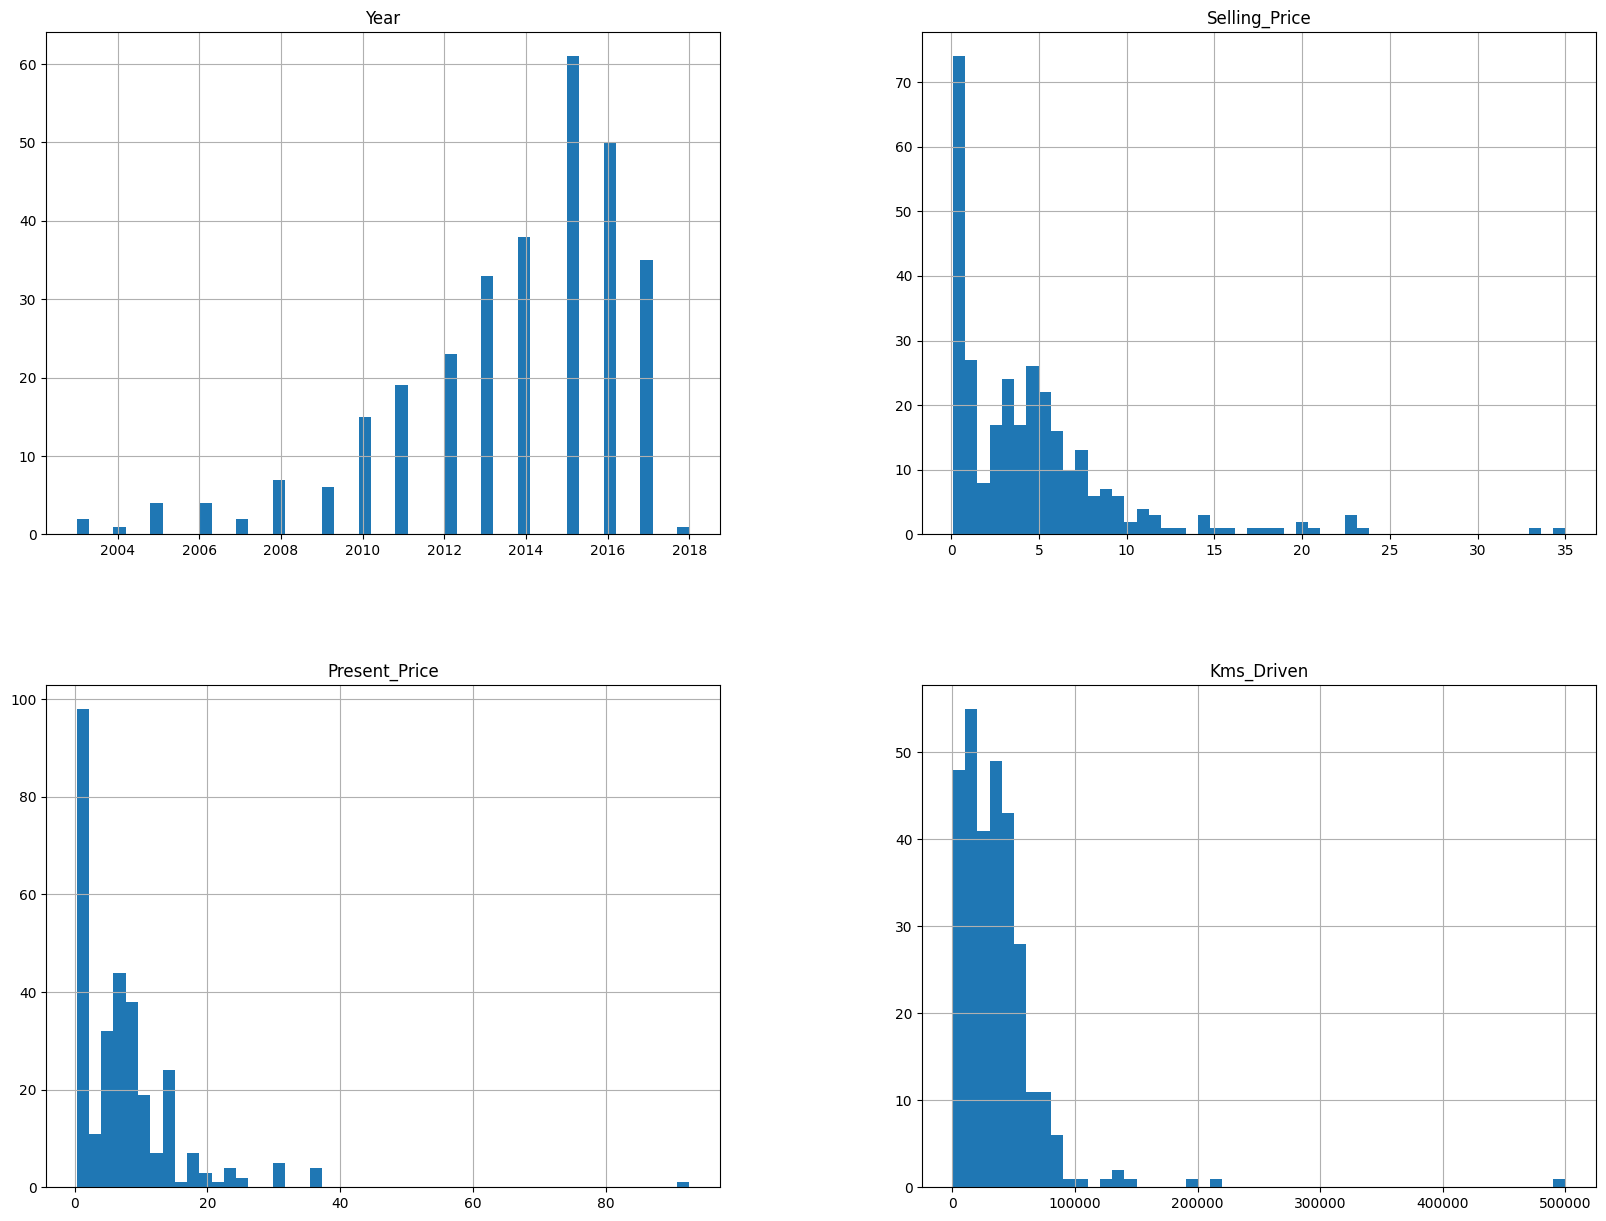

In [ ]:
cars = pd.read_csv("car-data.csv")
cars.info()
cars.hist(column=['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven'], bins=50, figsize=(20,15))
plt.show()

<Axes: >

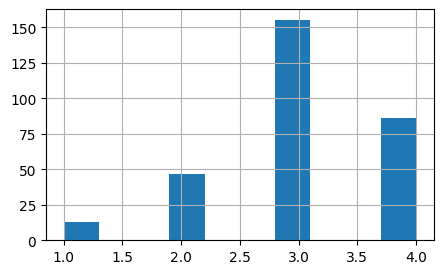

In [ ]:
np.random.seed(42)
strat_train_set, strat_test_set = train_test_split(cars, test_size=0.2, random_state=42)
cars['Year_Cat'] = pd.cut(cars["Year"], bins=[2003, 2007, 2011, 2015, 2019, np.inf], labels=[1, 2, 3, 4, 5], include_lowest=True)
cars['Year_Cat'].hist(figsize=(5,3))

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cars, cars['Year_Cat']):
    strat_train_set = cars.loc[train_index]
    strat_test_set = cars.loc[test_index]

strat_test_set['Year_Cat'].value_counts() / len(strat_test_set)

Year_Cat
3    0.508197
4    0.278689
2    0.163934
1    0.049180
5    0.000000
Name: count, dtype: float64

In [ ]:
corr_matrix = strat_train_set.corr(numeric_only=True)
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.883762
Year             0.207411
Kms_Driven       0.025787
Owner           -0.075288
Name: Selling_Price, dtype: float64

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Selling_Price', ylabel='Year'>,
        <Axes: xlabel='Present_Price', ylabel='Year'>,
        <Axes: xlabel='Kms_Driven', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Selling_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>],
       [<Axes: xlabel='Year', ylabel='Present_Price'>,
        <Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Kms_Driven', ylabel='Present_Price'>],
       [<Axes: xlabel='Year', ylabel='Kms_Driven'>,
        <Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>,
        <Axes: xlabel='Present_Price', ylabel='Kms_Driven'>,
        <Axes: xlabel='Kms_Driven', ylabel='Kms_Driven'>]], dtype=object)

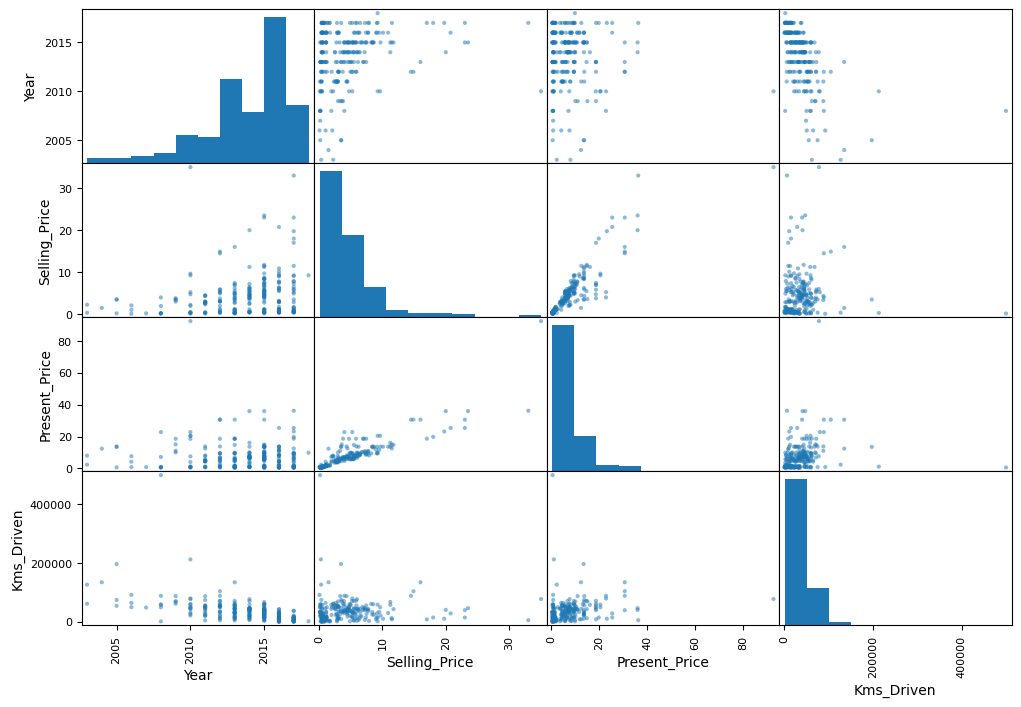

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']
scatter_matrix(strat_train_set[attributes], figsize=(12,8))

In [ ]:
strat_train_set['Kms_Year'] = strat_train_set['Kms_Driven']/(2019-(strat_train_set['Year']))
corr_matrix = strat_train_set.corr(numeric_only=True)
corr_matrix['Selling_Price'].sort_values(ascending=False)

Selling_Price    1.000000
Present_Price    0.883762
Kms_Year         0.233357
Year             0.207411
Kms_Driven       0.025787
Owner           -0.075288
Name: Selling_Price, dtype: float64

In [ ]:
strat_train_set['Owner']
cars_labels = strat_train_set['Selling_Price']
cars_inputs = strat_train_set.drop('Selling_Price', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cats = cars_inputs[['Year_Cat']]
cat_encoder = OneHotEncoder()
cars_cat_1hot = cat_encoder.fit_transform(cats)
print(cars_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 240 stored elements and shape (240, 4)>
  Coords	Values
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0
  (5, 2)	1.0
  (6, 3)	1.0
  (7, 3)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 3)	1.0
  (11, 0)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 3)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 3)	1.0
  (19, 2)	1.0
  (20, 1)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 3)	1.0
  (24, 2)	1.0
  :	:
  (215, 3)	1.0
  (216, 1)	1.0
  (217, 0)	1.0
  (218, 3)	1.0
  (219, 2)	1.0
  (220, 2)	1.0
  (221, 1)	1.0
  (222, 2)	1.0
  (223, 1)	1.0
  (224, 2)	1.0
  (225, 3)	1.0
  (226, 2)	1.0
  (227, 3)	1.0
  (228, 3)	1.0
  (229, 3)	1.0
  (230, 1)	1.0
  (231, 3)	1.0
  (232, 2)	1.0
  (233, 3)	1.0
  (234, 2)	1.0
  (235, 2)	1.0
  (236, 2)	1.0
  (237, 2)	1.0
  (238, 2)	1.0
  (239, 1)	1.0


In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

kms_ix, years_ix = 4, 1

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_kms_per_year=True):

        self.add_kms_per_year = add_kms_per_year

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.add_kms_per_year:
            kms_per_year = X[:, kms_ix] / X[:, years_ix]
            return np.c_[X, kms_per_year]
        return X
    
attr_adder = CombinedAttributesAdder(add_kms_per_year=True)
cars_extra_attribs = attr_adder.transform(cars.values)
print(cars_extra_attribs[1, :])


['sx4' 2013 4.75 9.54 43000 'Diesel' 'Dealer' 'Manual' 0 3
 21.361152508693493]


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
print(cars.info())
cars_num = cars.drop(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Selling_Price'], axis=1)
imputer.fit(cars_num)
I = imputer.transform(cars_num)
cars_num_tr = pd.DataFrame(I, columns=cars_num.columns, index=cars_num.index)
imputer.statistics_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    int64   
 5   Fuel_Type      301 non-null    object  
 6   Seller_Type    301 non-null    object  
 7   Transmission   301 non-null    object  
 8   Owner          301 non-null    int64   
 9   Year_Cat       301 non-null    category
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 21.8+ KB
None


array([2.014e+03, 6.400e+00, 3.200e+04, 0.000e+00, 3.000e+00])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cars_num_tr = num_pipeline.fit_transform(cars_num)

num_attribs = list(cars_num)
cat_attribs = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

cars_prepared = full_pipeline.fit_transform(cars)

In [ ]:
from sklearn.linear_model import LinearRegression

cars_labels = cars['Selling_Price']
lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

cars_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(cars_labels, cars_predictions)
lin_rmse = np.sqrt(lin_mse)
print(float(lin_rmse))

1.0634629139767748


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(cars_prepared, cars_labels)

DecisionTreeRegressor()

In [ ]:
cars_predictions = tree_reg.predict(cars_prepared)
tree_mse = mean_squared_error(cars_labels, cars_predictions)
tree_rmse = np.sqrt(tree_mse)
print(float(tree_rmse))

6.196017278920048e-18


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std: {scores.std()}')

display_scores(tree_rmse_scores)

Scores: [1.07117662 1.20692585 4.28891789 0.98736349 0.24344062 0.17700282
 0.52481743 1.71867779 0.86310872 1.50079646]
Mean: 1.2582227684234673
Std: 1.1162335779327988


In [ ]:
scores = cross_val_score(lin_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [2.87838527 2.38005934 3.98754744 2.42208052 1.44508872 5.73709946
 5.30325862 1.07886731 0.72336354 0.8894474 ]
Mean: 2.6845197623973953
Std: 1.7104326681677304


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.68271891 0.98526169 4.93226754 0.97031356 0.23006583 0.12468447
 0.41898564 0.85395612 0.70947582 0.90968391]
Mean: 1.081741349486706
Std: 1.3156033219617966


In [ ]:
forest_reg.fit(cars_prepared, cars_labels)
cars_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(cars_labels, cars_predictions)
forest_rmse = np.sqrt(forest_mse)
print(float(forest_rmse))

0.5973745350695002


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [6, 20, 50], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(cars_prepared, cars_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [6, 20, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 6}

In [ ]:
grid_search.best_estimator_.feature_importances_
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
extra_attribs = ['kms_per_year']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.19147916997818562), 'Present_Price'),
 (np.float64(0.1427537715826121), 'kms_per_year'),
 (np.float64(0.11858629801940197), 'fortuner'),
 (np.float64(0.09374510168414638), 'Kms_Driven'),
 (np.float64(0.06919484708435504), 'Year'),
 (np.float64(0.03775600600477059), 'innova'),
 (np.float64(0.019834980669262633), 'corolla altis'),
 (np.float64(0.01724904775701521), 'Year_Cat'),
 (np.float64(0.010019014313042822), 'city'),
 (np.float64(0.009940884980917716), 'creta'),
 (np.float64(0.008204007768785188), 'Owner'),
 (np.float64(0.006789504049951369), 'swift'),
 (np.float64(0.004702083776483866), 'elantra'),
 (np.float64(0.004360566949439956), 'eon'),
 (np.float64(0.003973509210570549), 'ciaz'),
 (np.float64(0.003439986135371672), 'verna'),
 (np.float64(0.0022369431089907877), 'sx4'),
 (np.float64(0.002088469571535239), 'Hero Passion X pro'),
 (np.float64(0.002053005933683601), 'grand i10'),
 (np.float64(0.0017896410630782093), 'ritz'),
 (np.float64(0.0013704808759396746), 'i2

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop('Selling_Price', axis=1)
y_test = strat_test_set['Selling_Price'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE: {float(final_rmse)}')

RMSE: 0.9556866755678471


In [ ]:
from scipy import stats
from sklearn.metrics import r2_score

def sign(n):
    return n/abs(n)

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
CI = list(stats.t.interval(confidence, len(squared_errors) - 1,
            loc=squared_errors.mean(),
            scale=stats.sem(squared_errors)))

signs = [sign(num) for num in CI]
CI = np.sqrt(np.abs(CI)) 
CI *= signs
print(f'CI: {CI}')
print(f'R^2: {r2_score(y_test, final_predictions)}')

CI: [-0.37595678  1.40286049]
R^2: 0.958186920128087
